In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings("ignore")

from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import roc_curve, auc 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 

np.random.seed(123) 

pd.options.mode.chained_assignment = None     # hide any pandas warnings

/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
pd.options.display.max_columns = 250

In [3]:
DATA_FOLDER = '../data/raw/'     # slash at the end!

It's a clean, easy to understand set of data. However, the meaning of some of the column headers are not obvious. Here's what they mean,

- age: The person's age in years
- sex: The person's sex (1 = male, 0 = female)
- cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
- trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)
- chol: The person's cholesterol measurement in mg/dl
- fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
- restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
- thalach: The person's maximum heart rate achieved
- exang: Exercise induced angina (1 = yes; 0 = no)
- oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
- slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
- ca: The number of major vessels (0-3)
- thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
- target: Heart disease (0 = no, 1 = yes)


In [4]:
df = pd.read_csv(DATA_FOLDER + 'heart.csv')

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df = df.rename(columns={
    'age': 'age', 
    'sex': 'sex', 
    'cp': 'chest_pain_type', 
    'trestbps': 'resting_blood_pressure', 
    'chol': 'cholesterol', 
    'fbs': 'fasting_blood_sugar', 
    'restecg': 'rest_ecg', 
    'thalach': 'max_heart_rate_achieved', 
    'exang': 'exercise_induced_angina', 
    'oldpeak': 'st_depression', 
    'slope': 'st_slope', 
    'ca': 'num_major_vessels', 
    'thal': 'thalassemia', 
    'target': 'target', 
})

In [8]:
df['sex'][df['sex'] == 0] = 'female'
df['sex'][df['sex'] == 1] = 'male'

df['chest_pain_type'][df['chest_pain_type'] == 1] = 'typical_angina'
df['chest_pain_type'][df['chest_pain_type'] == 2] = 'atypical_angina'
df['chest_pain_type'][df['chest_pain_type'] == 3] = 'non_anginal_pain'
df['chest_pain_type'][df['chest_pain_type'] == 4] = 'asymptomatic'

df['fasting_blood_sugar'][df['fasting_blood_sugar'] == 0] = 'lower_120mg_ml'
df['fasting_blood_sugar'][df['fasting_blood_sugar'] == 1] = 'greater_120mg_ml'

df['rest_ecg'][df['rest_ecg'] == 0] = 'normal'
df['rest_ecg'][df['rest_ecg'] == 1] = 'wave_abnormality'
df['rest_ecg'][df['rest_ecg'] == 2] = 'hypertrophy'

df['exercise_induced_angina'][df['exercise_induced_angina'] == 0] = 'no'
df['exercise_induced_angina'][df['exercise_induced_angina'] == 1] = 'yes'

df['st_slope'][df['st_slope'] == 1] = 'upsloping'
df['st_slope'][df['st_slope'] == 2] = 'flat'
df['st_slope'][df['st_slope'] == 3] = 'downsloping'

df['thalassemia'][df['thalassemia'] == 1] = 'normal'
df['thalassemia'][df['thalassemia'] == 2] = 'fixed_defect'
df['thalassemia'][df['thalassemia'] == 3] = 'reversable_defect'

In [9]:
df['sex'] = df['sex'].astype('object')
df['chest_pain_type'] = df['chest_pain_type'].astype('object')
df['fasting_blood_sugar'] = df['fasting_blood_sugar'].astype('object')
df['rest_ecg'] = df['rest_ecg'].astype('object')
df['exercise_induced_angina'] = df['exercise_induced_angina'].astype('object')
df['st_slope'] = df['st_slope'].astype('object')
df['thalassemia'] = df['thalassemia'].astype('object')

In [10]:
df = pd.get_dummies(df, drop_first=False)

In [11]:
df.head(10)

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target,sex_female,sex_male,chest_pain_type_0,chest_pain_type_atypical_angina,chest_pain_type_non_anginal_pain,chest_pain_type_typical_angina,fasting_blood_sugar_greater_120mg_ml,fasting_blood_sugar_lower_120mg_ml,rest_ecg_hypertrophy,rest_ecg_normal,rest_ecg_wave_abnormality,exercise_induced_angina_no,exercise_induced_angina_yes,st_slope_0,st_slope_flat,st_slope_upsloping,thalassemia_0,thalassemia_fixed_defect,thalassemia_normal,thalassemia_reversable_defect
0,63,145,233,150,2.3,0,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0
1,37,130,250,187,3.5,0,1,0,1,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0
2,41,130,204,172,1.4,0,1,1,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0
3,56,120,236,178,0.8,0,1,0,1,0,0,0,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0
4,57,120,354,163,0.6,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0
5,57,140,192,148,0.4,0,1,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0
6,56,140,294,153,1.3,0,1,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0
7,44,120,263,173,0.0,0,1,0,1,0,0,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1
8,52,172,199,162,0.5,0,1,0,1,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1
9,57,150,168,174,1.6,0,1,0,1,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0


In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('target', 1), df['target'], test_size=0.2, random_state=10
)

In [13]:
model = RandomForestClassifier(max_depth=5)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [14]:
y_predict = model.predict(X_test)
y_pred_quant = model.predict_proba(X_test)[:, 1]
y_pred_bin = model.predict(X_test)

In [15]:
def roc_auc_plot(y_true, y_proba):

    if isinstance(y_true, pd.core.series.Series):
        y_true = y_true.values
    if isinstance(y_proba, pd.core.series.Series):
        y_proba = y_proba.values

    if y_proba.ndim == 1: # reshape from [0.4, 0.45] to [[.6, .4], [.55, .45]]
        y_proba = np.hstack(((1-y_proba).reshape(-1,1), y_proba.reshape(-1,1)))  

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(2):
        fpr[i], tpr[i], _ = roc_curve(y_true, y_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure()   
    plt.plot(fpr[1], tpr[1], color='darkorange',
             lw=2, label='ROC curve (area = %0.4f)' % roc_auc[1])
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.01])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    plt.legend(loc="lower right", fontsize=13.5)
    plt.show()


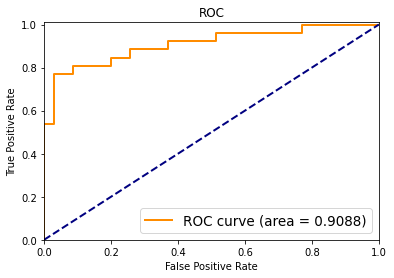

In [16]:
roc_auc_plot(y_test, y_pred_quant)

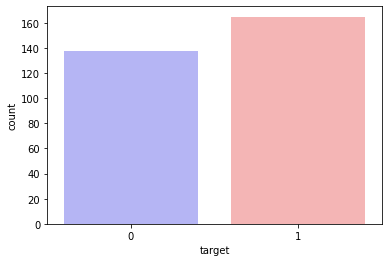

In [17]:
sns.countplot(x="target", data=df, palette="bwr")
plt.show()

In [18]:
df.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target,sex_female,sex_male,chest_pain_type_0,chest_pain_type_atypical_angina,chest_pain_type_non_anginal_pain,chest_pain_type_typical_angina,fasting_blood_sugar_greater_120mg_ml,fasting_blood_sugar_lower_120mg_ml,rest_ecg_hypertrophy,rest_ecg_normal,rest_ecg_wave_abnormality,exercise_induced_angina_no,exercise_induced_angina_yes,st_slope_0,st_slope_flat,st_slope_upsloping,thalassemia_0,thalassemia_fixed_defect,thalassemia_normal,thalassemia_reversable_defect
0,63,145,233,150,2.3,0,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0
1,37,130,250,187,3.5,0,1,0,1,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0
2,41,130,204,172,1.4,0,1,1,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0
3,56,120,236,178,0.8,0,1,0,1,0,0,0,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0
4,57,120,354,163,0.6,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0


In [19]:
countFemale = len(df[df.sex_male == 0])
countMale = len(df[df.sex_male == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df.sex_male)) * 100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df.sex_male)) * 100)))


Percentage of Female Patients: 31.68%
Percentage of Male Patients: 68.32%


In [20]:
df.groupby('target').mean()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,sex_female,sex_male,chest_pain_type_0,chest_pain_type_atypical_angina,chest_pain_type_non_anginal_pain,chest_pain_type_typical_angina,fasting_blood_sugar_greater_120mg_ml,fasting_blood_sugar_lower_120mg_ml,rest_ecg_hypertrophy,rest_ecg_normal,rest_ecg_wave_abnormality,exercise_induced_angina_no,exercise_induced_angina_yes,st_slope_0,st_slope_flat,st_slope_upsloping,thalassemia_0,thalassemia_fixed_defect,thalassemia_normal,thalassemia_reversable_defect
target,,,,,,,,,,,,,,,,,,,,,,,,,,
0,56.601449,134.398551,251.086957,139.101449,1.585507,1.166667,0.173913,0.826087,0.753623,0.130435,0.050725,0.065217,0.159420,0.840580,0.021739,0.572464,0.405797,0.449275,0.550725,0.086957,0.253623,0.65942,0.007246,0.260870,0.086957,0.644928
1,52.496970,129.303030,242.230303,158.466667,0.583030,0.363636,0.436364,0.563636,0.236364,0.418182,0.096970,0.248485,0.139394,0.860606,0.006061,0.412121,0.581818,0.860606,0.139394,0.054545,0.648485,0.29697,0.006061,0.787879,0.036364,0.169697


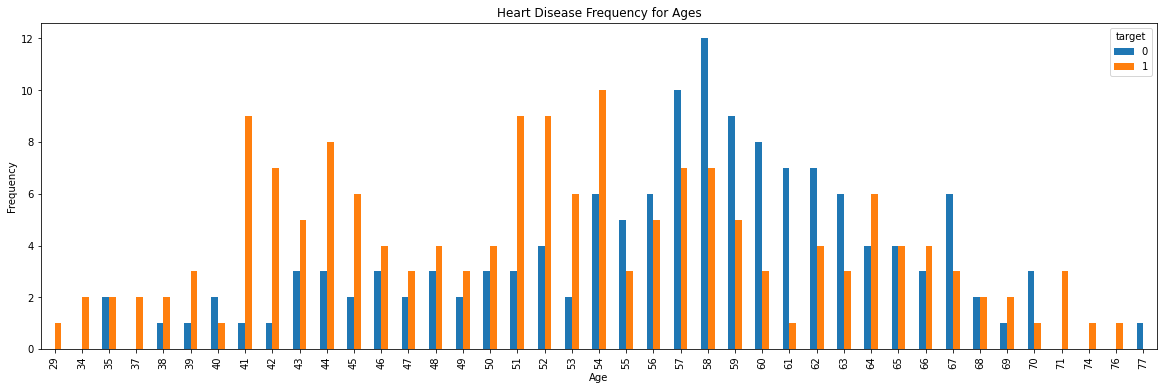

In [21]:
pd.crosstab(df.age, df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


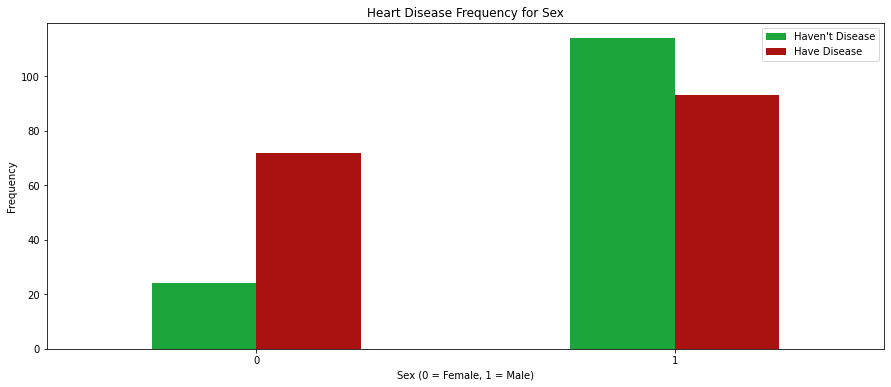

In [22]:
pd.crosstab(df.sex_male, df.target).plot(kind="bar", figsize=(15,6), color=['#1CA53B', '#AA1111'])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()


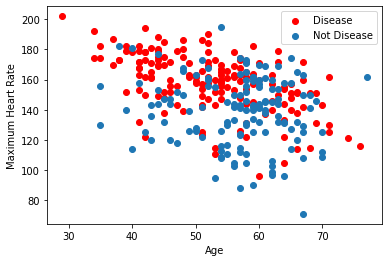

In [23]:
plt.scatter(x=df.age[df.target == 1], y=df.max_heart_rate_achieved[(df.target == 1)], c="red")
plt.scatter(x=df.age[df.target == 0], y=df.max_heart_rate_achieved[(df.target == 0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()


In [24]:
df.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target,sex_female,sex_male,chest_pain_type_0,chest_pain_type_atypical_angina,chest_pain_type_non_anginal_pain,chest_pain_type_typical_angina,fasting_blood_sugar_greater_120mg_ml,fasting_blood_sugar_lower_120mg_ml,rest_ecg_hypertrophy,rest_ecg_normal,rest_ecg_wave_abnormality,exercise_induced_angina_no,exercise_induced_angina_yes,st_slope_0,st_slope_flat,st_slope_upsloping,thalassemia_0,thalassemia_fixed_defect,thalassemia_normal,thalassemia_reversable_defect
0,63,145,233,150,2.3,0,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0
1,37,130,250,187,3.5,0,1,0,1,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0
2,41,130,204,172,1.4,0,1,1,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0
3,56,120,236,178,0.8,0,1,0,1,0,0,0,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0
4,57,120,354,163,0.6,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0


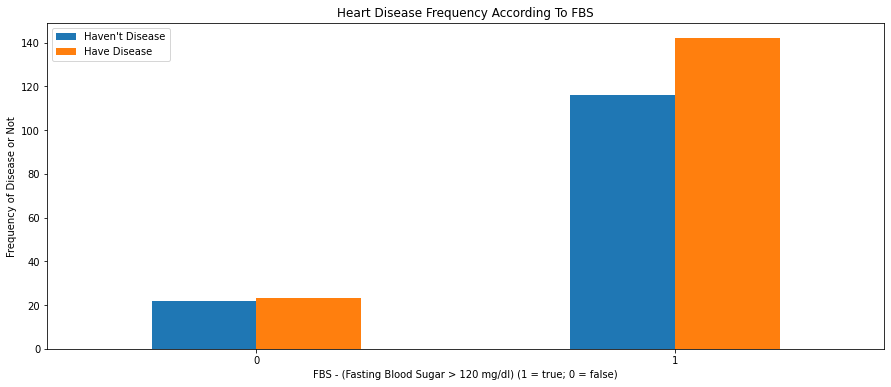

In [25]:
pd.crosstab(df.fasting_blood_sugar_lower_120mg_ml, df.target).plot(kind="bar", figsize=(15, 6))
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()